In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [3]:
make_list = fuel_econ.make.value_counts() 

In [4]:
make_list

BMW                  523
Mercedes-Benz        269
Porsche              235
Ford                 218
Chevrolet            212
MINI                 201
Audi                 201
Volkswagen           174
Hyundai              158
Dodge                140
Lexus                125
Kia                  124
Cadillac             118
Toyota               116
Infiniti             108
Honda                101
Jaguar                98
Mazda                 87
Nissan                71
Buick                 66
Subaru                60
Chrysler              58
Lincoln               52
Volvo                 50
Acura                 46
Bentley               45
Mitsubishi            44
Rolls-Royce           42
Maserati              39
Scion                 27
Fiat                  26
Ferrari               23
Genesis               17
Aston Martin          15
Suzuki                13
Roush Performance     10
Lotus                 10
Alfa Romeo             6
Karma                  1
Name: make, dtype: int64

In [5]:
type(make_list)

pandas.core.series.Series

In [6]:
# get a subset of the series
subset_make_list = make_list[make_list>80]

In [7]:
subset_make_list

BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
MINI             201
Audi             201
Volkswagen       174
Hyundai          158
Dodge            140
Lexus            125
Kia              124
Cadillac         118
Toyota           116
Infiniti         108
Honda            101
Jaguar            98
Mazda             87
Name: make, dtype: int64

In [8]:
# Convert series to a dataframe with new reindex
df_subset_make_list = subset_make_list.to_frame().reset_index()

In [9]:
df_subset_make_list
df_subset_make_list.rename(columns = {'index':'make', 'make':'total_counts'}, inplace=True)

In [10]:
df_subset_make_list

,make,total_counts
0,BMW,523
1,Mercedes-Benz,269
2,Porsche,235
3,Ford,218
4,Chevrolet,212
5,MINI,201
6,Audi,201
7,Volkswagen,174
8,Hyundai,158
9,Dodge,140


In [11]:
# join the new df_subset_make_list with the original fuel_econ to get only those in the df_subset_make_list
subset_fuel_econ = pd.merge(fuel_econ, df_subset_make_list, on='make')

In [13]:
subset_fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3208 entries, 0 to 3207
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3208 non-null   int64  
 1   make          3208 non-null   object 
 2   model         3208 non-null   object 
 3   year          3208 non-null   int64  
 4   VClass        3208 non-null   object 
 5   drive         3208 non-null   object 
 6   trans         3208 non-null   object 
 7   fuelType      3208 non-null   object 
 8   cylinders     3208 non-null   int64  
 9   displ         3208 non-null   float64
 10  pv2           3208 non-null   int64  
 11  pv4           3208 non-null   int64  
 12  city          3208 non-null   float64
 13  UCity         3208 non-null   float64
 14  highway       3208 non-null   float64
 15  UHighway      3208 non-null   float64
 16  comb          3208 non-null   float64
 17  co2           3208 non-null   int64  
 18  feScore       3208 non-null 

In [ ]:
# convert 'make' object type to 'Categorical data type'

In [19]:
sub_make_class = ['BMW','Mercedes-Benz','Porsche','Ford','Chevrolet',
                  'MINI','Audi','Volkswagen','Hyundai','Dodge','Lexus',
                  'Kia','Cadillac','Toyota','Infiniti','Honda','Jaguar','Mazda']
makeclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sub_make_class)
subset_fuel_econ['make'] = subset_fuel_econ['make'].astype(makeclasses)

In [21]:
subset_fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3208 entries, 0 to 3207
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            3208 non-null   int64   
 1   make          3208 non-null   category
 2   model         3208 non-null   object  
 3   year          3208 non-null   int64   
 4   VClass        3208 non-null   object  
 5   drive         3208 non-null   object  
 6   trans         3208 non-null   object  
 7   fuelType      3208 non-null   object  
 8   cylinders     3208 non-null   int64   
 9   displ         3208 non-null   float64 
 10  pv2           3208 non-null   int64   
 11  pv4           3208 non-null   int64   
 12  city          3208 non-null   float64 
 13  UCity         3208 non-null   float64 
 14  highway       3208 non-null   float64 
 15  UHighway      3208 non-null   float64 
 16  comb          3208 non-null   float64 
 17  co2           3208 non-null   int64   
 18  feScore 

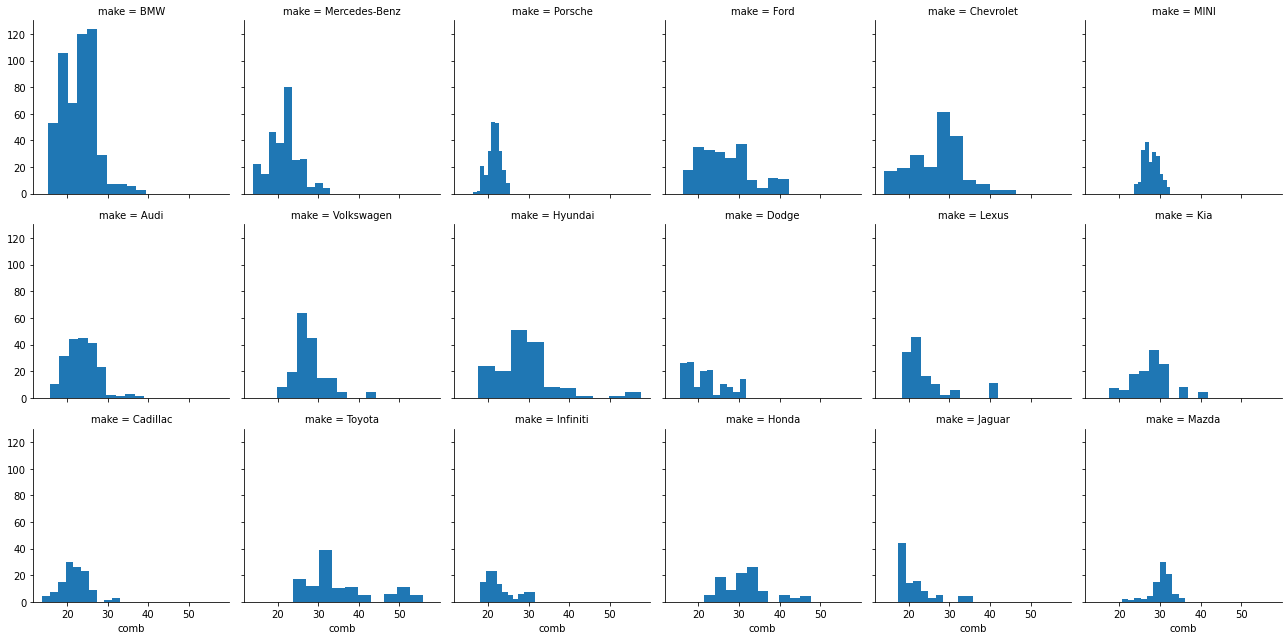

In [50]:
# Try experimenting with dynamic bin edges
#bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = subset_fuel_econ, col = 'make', col_wrap=6, sharex=True, sharey=True, 
                col_order=subset_fuel_econ.make.value_counts().index)
g.map(plt.hist, "comb");

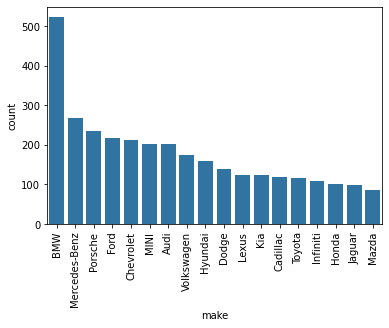

In [28]:
base_color = sb.color_palette()[0]
sb.countplot(data=subset_fuel_econ, x='make', order=subset_fuel_econ.make.value_counts().index, color=base_color);
plt.xticks(rotation=90);

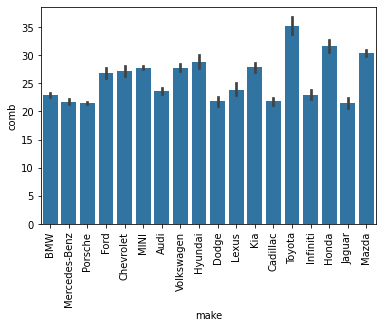

In [29]:
sb.barplot(data=subset_fuel_econ, x='make', y='comb', color=base_color);
plt.xticks(rotation=90);

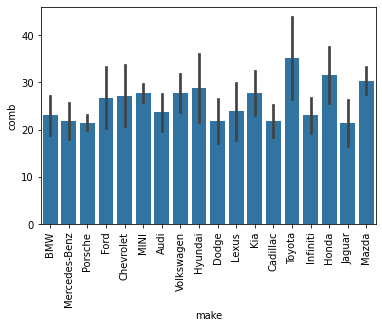

In [31]:
sb.barplot(data=subset_fuel_econ, x='make', y='comb', color=base_color, ci='sd');
plt.xticks(rotation=90);

In [53]:
# This is kind of important
make_means = subset_fuel_econ.groupby('make').mean()
make_means

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,total_counts
make,,,,,,,,,,,,,,,
BMW,35953.648184,2015.493308,5.973231,3.083748,35.441683,55.269598,19.862614,25.157074,28.649093,40.927519,23.004798,394.885277,5.221797,5.214149,523.0
Mercedes-Benz,35913.587361,2015.394052,6.795539,3.820446,29.732342,62.568773,18.896946,23.871183,26.795179,37.690972,21.765718,419.828996,4.799257,4.799257,269.0
Porsche,36118.412766,2015.676596,6.204255,3.533617,53.038298,24.936170,18.774142,23.613414,26.199897,37.003414,21.504786,413.400000,4.778723,4.795745,235.0
Ford,36168.706422,2015.559633,4.770642,2.560092,19.977064,67.908257,24.015862,31.406761,31.864245,46.266219,26.796018,345.027523,6.261468,6.261468,218.0
Chevrolet,35903.301887,2015.476415,4.886792,2.599528,19.740566,67.037736,23.955976,31.080558,33.017294,47.937314,27.224809,343.957547,6.386792,6.353774,212.0
MINI,36063.034826,2015.537313,3.786070,1.694030,14.706468,5.353234,24.922366,32.219974,32.449508,46.911494,27.807288,320.124378,6.721393,6.726368,201.0
Audi,35835.398010,2015.532338,5.512438,2.751741,25.781095,48.786070,20.426925,25.652045,29.389482,40.513205,23.639240,384.676617,5.432836,5.402985,201.0
Volkswagen,35416.551724,2015.034483,4.224138,2.076437,21.045977,35.540230,24.474875,31.103506,33.390893,47.435924,27.769875,331.626437,6.683908,6.528736,174.0
Hyundai,35803.639241,2015.417722,4.481013,2.273418,9.765823,76.848101,25.746294,33.590951,33.917482,48.984818,28.793620,323.500000,6.759494,6.759494,158.0


In [55]:
comb_order = make_means.sort_values('comb', ascending=False).index
comb_order

CategoricalIndex(['Toyota', 'Honda', 'Mazda', 'Hyundai', 'Kia', 'MINI',
                  'Volkswagen', 'Chevrolet', 'Ford', 'Lexus', 'Audi', 'BMW',
                  'Infiniti', 'Dodge', 'Cadillac', 'Mercedes-Benz', 'Porsche',
                  'Jaguar'],
                 categories=['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'MINI', 'Audi', 'Volkswagen', ...], ordered=True, dtype='category', name='make')

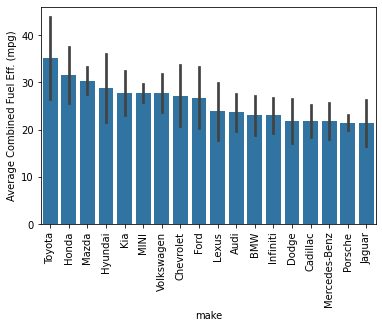

In [58]:
sb.barplot(data=subset_fuel_econ, x='make', y='comb', color=base_color, ci='sd', order=comb_order);
plt.ylabel('Average Combined Fuel Eff. (mpg)')
plt.xticks(rotation=90);

Text(0.5, 0, 'Average Combined Fuel Eff. (mpg)')

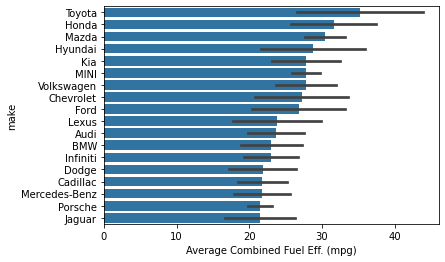

In [59]:
sb.barplot(data=subset_fuel_econ, y='make', x='comb', color=base_color, ci='sd', order=comb_order);
plt.xlabel('Average Combined Fuel Eff. (mpg)')


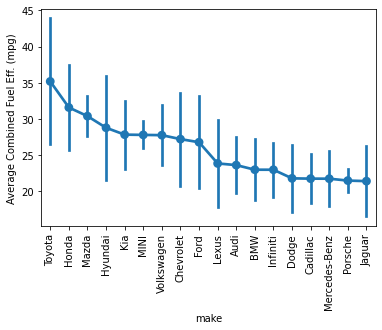

In [60]:
sb.pointplot(data=subset_fuel_econ, x='make', y='comb', color=base_color, ci='sd', order=comb_order);
plt.ylabel('Average Combined Fuel Eff. (mpg)')
plt.xticks(rotation=90);